In [1]:
from qiskit.quantum_info import Statevector, SparsePauliOp, Operator
from qiskit.circuit.library import StatePreparation, HGate
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt

import qc_utils as qcu
from ansatz import HE_ansatz,fixed_ansatz
import vqls

import logging

In [2]:
logging.getLogger("vqls_logger").setLevel(logging.INFO)

In [3]:
# 2 qubits example 

A = SparsePauliOp('II') + 0.2 * SparsePauliOp('ZI') + 0.2 * SparsePauliOp('XI')
# A = 0.55*SparsePauliOp('II') + 0.45*SparsePauliOp('IZ')
A = A.to_matrix()

# A = np.random.uniform(-1,1,[4,4])
# A = (A + A.T)/2

H_operator = Operator(HGate())
b = np.ones([4,]) / np.sqrt(4)
# B = (H_operator.tensor(H_operator)).to_matrix()

# b = np.random.uniform(-1,1,[4,])
# b = b/np.sqrt(sum(b**2))
# prep = StatePreparation(b.squeeze())


# A_LCU = qcu.get_LCU(A)
# B_LCU = qcu.get_LCU(B)

n = 2
d = 2
params0 = np.zeros(n*d)
# params0 = np.random.uniform(-1,1,[n*d,])

In [4]:
# 3 qubits example 
 
# A = SparsePauliOp('III') + 0.2 * SparsePauliOp('XZI') + 0.2 * SparsePauliOp('XII')
# A = 0.55*SparsePauliOp('III') + 0.45*SparsePauliOp('IIZ')
# A = A.to_matrix()

# H_operator = Operator(HGate())
# b = np.ones([8,]) / np.sqrt(8)
# B = (H_operator.tensor(H_operator).tensor(H_operator)).to_matrix()

# b = np.random.uniform(-1,1,[8,])
# b = b/np.sqrt(sum(b**2))

# n = 3
# d = 2
# params0 = np.zeros(n*d)
# params0 = np.random.uniform(-1,1,[n*d,])

In [10]:
# Define objects

vqls_est_local = vqls.EstimatorVQLSLocal(
    A=A,
    b=b,
    d=d,
    params0=params0,
    ansatz_function=fixed_ansatz
)

vqls_est_global = vqls.EstimatorVQLSGlobal(
    A=A,
    b=b,
    d=d,
    params0=params0,
    ansatz_function=fixed_ansatz
)


vqls_sam_local = vqls.SamplerVQLSLocal(
    A=A,
    b=b,
    d=d,
    params0=params0,
    ansatz_function=fixed_ansatz,
    num_shots=2000
)

vqls_sam_global = vqls.SamplerVQLSGlobal(
    A=A,
    b=b,
    d=d,
    params0=params0,
    ansatz_function=fixed_ansatz,
    num_shots=2000
)

In [11]:
vqls_est_local.run(method='COBYLA', options={"maxiter": 10})

vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.41891891891891897
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.2085511727169448
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.09292008395937279
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.12490351414128487
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.11303412705666771
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.02841907509970204
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.08561610100860245
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.07978127275839658
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.03114391776599179
vqls.py, 339, EstimatorVQLSLocal.calculate_cost(): 0.016220995982193065


In [12]:
vqls_sam_local.run(method='COBYLA', options={"maxiter": 10})

vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.42914662487164246
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.20292454881495986
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.09822912592882282
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.1242239830093122
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.11550394602084452
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.03474529346622379
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.09211802748585302
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.08816800647151024
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.03448093500449512
vqls.py, 614, SamplerVQLSLocal.calculate_cost(): 0.023287242517355144


In [13]:
qc_est_local = vqls_est_local.get_optimal_circuit()
print(qc_est_local)


     ┌────────────┐   ┌───────────────┐   
q_0: ┤ Ry(1.8517) ├─■─┤ Ry(-0.068448) ├─■─
     ├────────────┤ │ └┬──────────────┤ │ 
q_1: ┤ Ry(1.7155) ├─■──┤ Ry(-0.11274) ├─■─
     └────────────┘    └──────────────┘   


In [14]:
sv_est_local = Statevector(qc_est_local)
sv_sam_local = Statevector(vqls_sam_local.get_optimal_circuit())

x_exact = np.linalg.inv(A) @ b
sv_x_exact = Statevector(x_exact)

In [17]:
print(f"Fidelity Sam. VQLS Local cost = {sv_x_exact.inner(sv_sam_local)}")
print(f"Fidelity Est. VQLS Local cost = {sv_x_exact.inner(sv_est_local)}")


Fidelity Sam. VQLS Local cost = (0.8574756687588678+0j)
Fidelity Est. VQLS Local cost = (0.8706551841336143+0j)


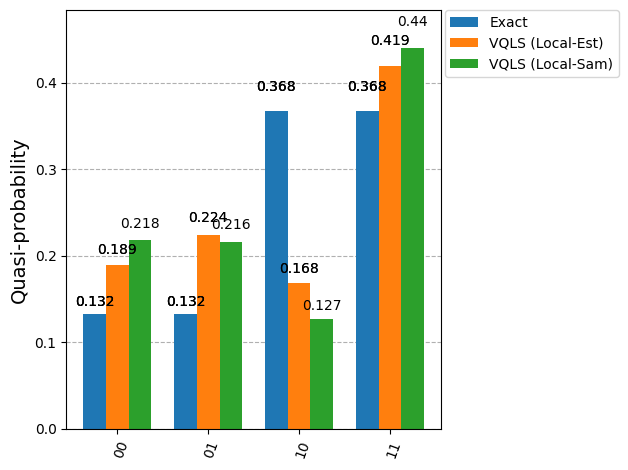

In [16]:
plot_histogram([sv_x_exact.probabilities_dict(), sv_est_local.probabilities_dict(),sv_sam_local.probabilities_dict()], legend=['Exact', 'VQLS (Local-Est)', 'VQLS (Local-Sam)'])